In [1]:
from IPython.display import Image

# 이전 발표 관련

이전 발표에는 첫번째로 다중클래스 분류를 위한 여러가지 방법에 대해 설명하였습니다. 

기본적으로 OneVsRestClassifier,OneVsOneClassifier 등이 있었습니다.

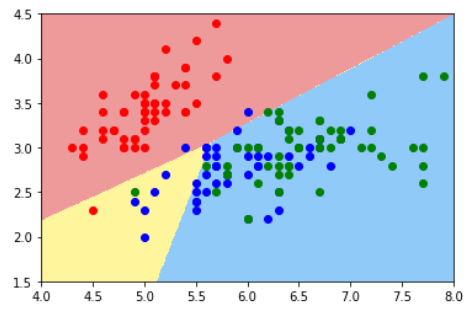

In [13]:
#OVR
Image("./1.png")

보시는바와 같이 OVR은 한 클래스는 정확히 분류하고 이를 제외한 나머지는 분류성능이 떨어지는 모습입니다.

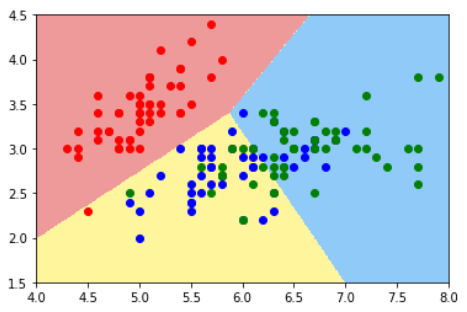

In [9]:
#OVO
Image("./2.png")

OVO은 어느정도 분포를 맞춘 분류성능을 갖춘 모습이라 할 수 있습니다. 

데이터 상황마다 분류기를 선택하여 학습하면 되겠습니다.

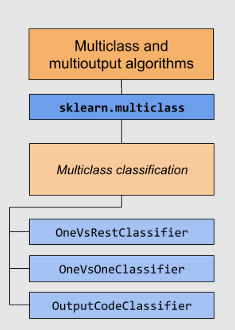

In [14]:
#ECOC
Image("./3.png")

두번째는 다중 클래스 문제를 다중 이진 클래스로 바꾸어 학습하는 OutputCodeClassifier에 대해서도 알아보았습니다.

싸이킷런에서 다중클래스 분류에 3가지 분류기를 제공하고 있으며 첫번째 두번째는 앞챕터에서 설명하였던 ovr,ovo입니다.

OutputCodeClassifier에 해당하는 ECOC(Error-Correcting Output Code)전략을 사용하여 앞선 두가지 OVR,OVO 기법을 비교하여 최적화된 분류정확도를 나타낼수 있겠습니다.

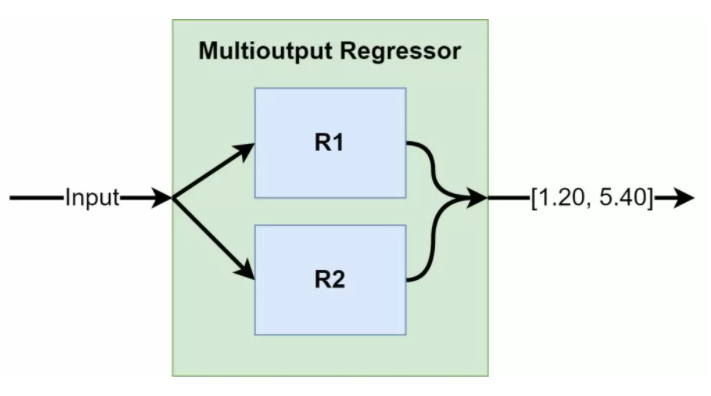

In [15]:
#Multioutputregressor
Image("./4.png")

세번째는 다중 출력 회귀 모델에 대해서도 알아보았습니다.

MultiOutputRegressor를 사용하여 입력이 주어지고 두개 이상의 숫자 값을 예측하는 기법이였습니다.



많은 기계 학습 알고리즘은 단순히 단일 숫자 값을 예측하기 위해 설계되었지만

SupportVector, DicisionTree 그룹과 같은 일부 알고리즘은 본질적으로 다중 출력 회귀를 지원하여

주로 관련 알고리즘을 사용한 코드에 대해 학습하였습니다.

# chapter 11. Dynamic Classifier Selection

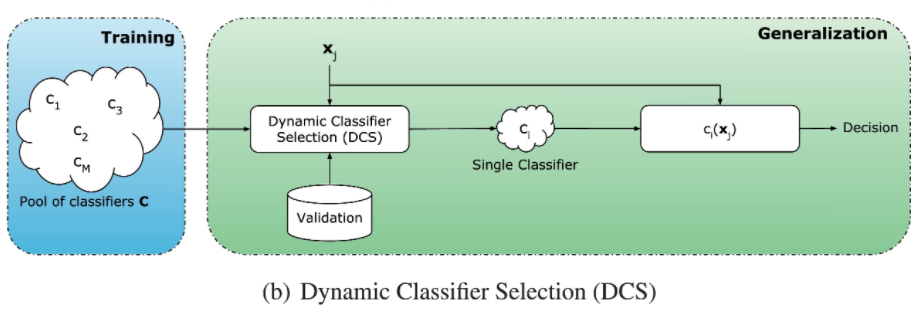

In [17]:
Image("./5.png")

마지막으로 설명하였던 Dynamic Classifier Selection(동적분류기선택)은

분류 예측 모델링을 위한 알고리즘의 대표적인 기법입니다.

본 기법은 training set에 pool에 있는 여러 분류기 모델을 fitting시킨 후 다음 예측할 예제의 특징점기반으로 예측 시

가장 잘 수행될 것으로 예상하는 모델을 선택하는 작업이 포함됩니다.

### make_classification 매개변수분석

 make_classification
 
n_samples 데이터 수

n_features 독립 변수의 수 (특징점의 수)

n_informative 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수

n_redundant 중복생성 수

n_repeated 정수, 기본값=0
정보 및 중복 기능에서 무작위로 추출한 중복된 기능의 수입니다.

n_classes 정수, 기본값=2
분류 문제의 클래스(또는 레이블) 수입니다.

n_clusters_per_class 정수, 기본값=2
클래스당 클러스터 수입니다.

In [2]:
# evaluate DCS-LA(local-class-acc) using OLA with a custom pool of algorithms
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deslib.dcs.ola import OLA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# define classifiers to use in the pool
classifiers = [
	LogisticRegression(),
	DecisionTreeClassifier(),
	GaussianNB()]

# fit each classifier on the training set
for c in classifiers:
	c.fit(X_train, y_train)
    
# define the DCS-LA model(OLA:Overall Local ACC)
model = OLA(pool_classifiers=classifiers)

# fit the model
model.fit(X_train, y_train)

# make predictions on the test set
yhat = model.predict(X_test)

# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

# evaluate contributing models
for c in classifiers:
	yhat = c.predict(X_test)
	score = accuracy_score(y_test, yhat)
	print('>%s: %.3f' % (c.__class__.__name__, score))

Accuracy: 0.913
>LogisticRegression: 0.878
>DecisionTreeClassifier: 0.883
>GaussianNB: 0.873


최종 결과로 보면 알 수 있듯이 DCS-LA기법의 모델(OLA)이 개별 분류기의 모델보다 성능이 높음을 알 수 있습니다.

# chapter 12. Dynamic Ensemble Selection

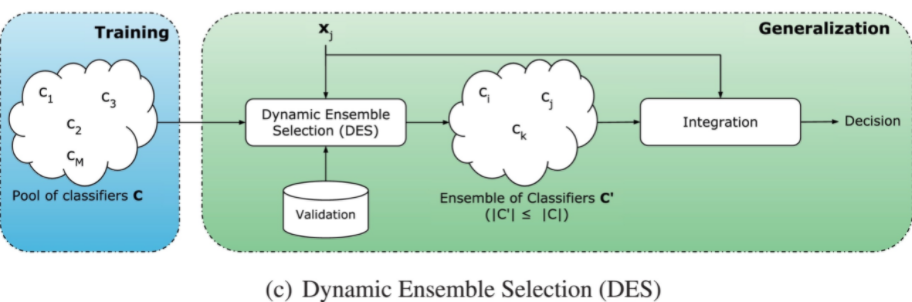

In [18]:
Image("./6.png")

본 챕터 Dynamic Ensemble Selection(동적앙상블선택)은

앞서 설명한 동적분류기선택 기법과 매우 유사하게 작동합니다.

training set에 pool에 있는 여러 분류기 모델을 fitting시키는 것은 똑같지만

단일 베스트 모델을 선별할 시에는 분류기를 앙상블하여 knn기반의 적분방식을 사용해 선별한다는 것이 차이점이라 할 수 있겠습니다.

In [3]:
# evaluate KNORA-U dynamic ensemble selection with a custom pool of algorithms
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deslib.des.knora_u import KNORAU
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# define classifiers to use in the pool
classifiers = [
	LogisticRegression(),
	DecisionTreeClassifier(),
	GaussianNB()]
# fit each classifier on the training set
for c in classifiers:
	c.fit(X_train, y_train)
# define the KNORA-U model(k-Nearest Oracle-Union)
model = KNORAU(pool_classifiers=classifiers)
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))
# evaluate contributing models
for c in classifiers:
	yhat = c.predict(X_test)
	score = accuracy_score(y_test, yhat)
	print('>%s: %.3f' % (c.__class__.__name__, score))

Accuracy: 0.914
>LogisticRegression: 0.878
>DecisionTreeClassifier: 0.884
>GaussianNB: 0.873


최종 결과로 보면 알 수 있듯이 DES기법의 모델(KNORA-U)이 개별 분류기의 모델보다 성능이 높음을 알 수 있습니다.

# chapter 13. Mixture of Experts

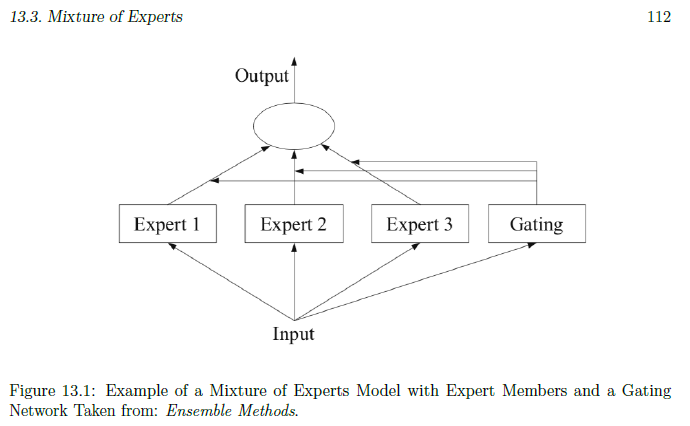

In [10]:
Image("./7.png")

본 장은 전문가 혼합기법에 대한 설명으로 신경망의 측면에서 개발된 앙상블 학습 기법입니다.

각 분해된 전문가 모델을 교육하고, 예측할 입력을 기반으로 신뢰할 전문가를 학습하여, 예측을 결합하는

Gating 모델을 개발하는 것이 포함됩니다.

따라서 스태킹 모델과 강한 유사성이 있고 meta-learner가 포함됩니다.

다만 본 혼합기법은 신경망의 측면에서 설명되어 인기가 떨어지고, stacking 기법과 유사하여 코드가 제공되지 않습니다.

혹 본 기법의 최신동향이 궁금하다면 구글에서 출판한 

"Modeling Task Relationships in Multi-task Learning with Multi-gate Mixture-of-Experts" KDD 2018, jia qi et al.을 읽어보는 것도 추천드립니다.


# Bagging

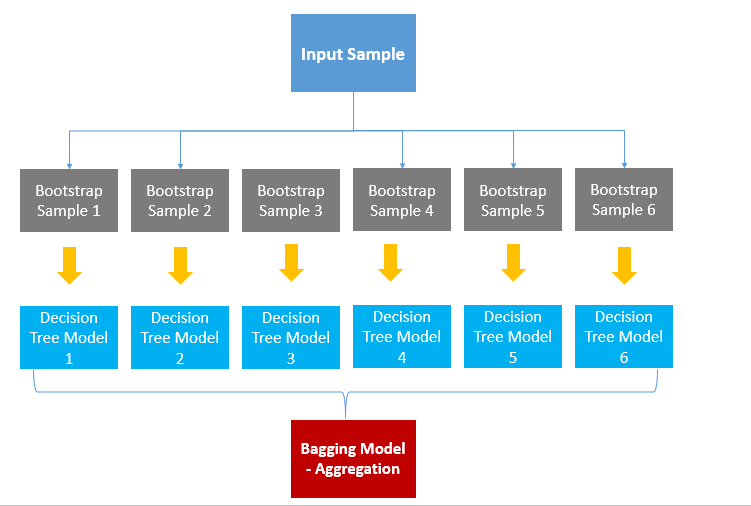

In [11]:
Image("./8.png")

"Bagging" : Bootstrap AGGregatING 의 약자로 입력값 샘플을 복원추출(bootstrap)하여 각 모델을 학습시켜 결과물을 집계(Aggregation)하는 방법입니다.

주어진 데이터셋으로부터 Random sampling을 통해 각 decision tree를 만들기위한 sample subset을 생성하고, 이때 sampling되는 데이터는 중복을 허용하여 만듭니다.

최종적으로는 학습된 모델의 결과를 집계하여 최종 결과 값을 구하는데 최종 집계시에는 과반수 이상이 선택한 답이 정답이 되는 voting에 의해 예측값이 결정됩니다.

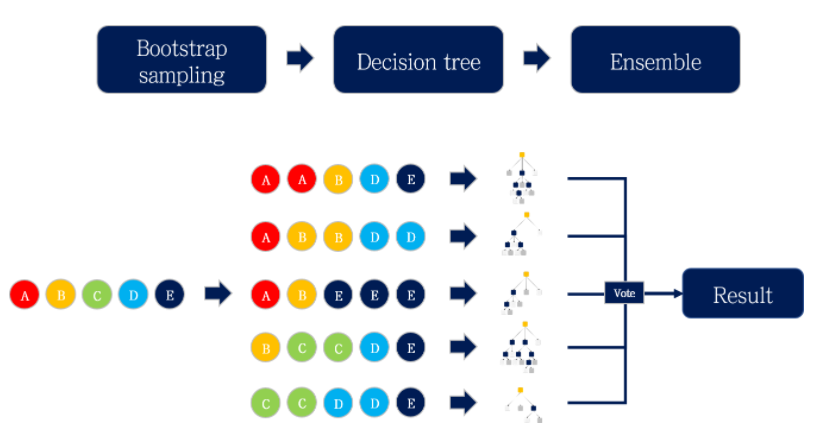

In [24]:
Image("./9.png")

최종적으로는 다음과 같이 학습이 되는 방식으로 볼 수 있겠습니다.

# chapter 14. Bagged Decision Trees Ensemble

In [22]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.936


앞선 분류 데이터 셋과 같이 불러왔고, scikit-learn에서 제공하는

가장 기본적인 baggingclassifier을 이용하여 예측한 코드입니다.

In [26]:
# make predictions using bagging for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [-4.7705504, -1.88685058, -0.96057964, 2.53850317, -6.5843005, 3.45711663, -7.46225013, 2.01338213, -0.45086384, -1.89314931, -2.90675203, -0.21214568, -0.9623956, 3.93862591, 0.06276375, 0.33964269, 4.0835676, 1.31423977, -2.17983117, 3.1047287]
yhat = model.predict([row])
# summarize the prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


분류 데이터셋을 불러온 후, 단일 row를 생성해 클래스 예측을 실행한 코드입니다.

# chapter 15. Random Subspace Ensemble

In [27]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(bootstrap=False, max_features=10)
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.929


같은 분류 데이터 셋을 불러온 후 앞서 사용한 baggingclassifier 파라미터를 수정하였습니다.

param중 bootstrap=False, max_feature를 10으로 고정하여 복원추출을 하지않고 특징점 추출을 10으로 고정하였습니다.

### BaggingClassifier parameter
base_estimator 기본 추정기는 DicisionTreeClassifier

n_estimators 기본 추정수

max_features 특징점 추출수

oob_score 부울, 기본값=거짓
일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할지 여부입니다. bootstrap=True인 경우에만 사용할 수 있습니다.

n_jobs 정수, 기본값=없음
fit및 에 대해 병렬로 실행할 작업 수입니다 predict. 문맥이 None아닌 한 1을 의미합니다 joblib.parallel_backend. -1모든 프로세서를 사용하는 것을 의미합니다. 

In [28]:
# make predictions using bagging for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(bootstrap=False, max_features=10)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [-4.7705504, -1.88685058, -0.96057964, 2.53850317, -6.5843005, 3.45711663, -7.46225013, 2.01338213, -0.45086384, -1.89314931, -2.90675203, -0.21214568, -0.9623956, 3.93862591, 0.06276375, 0.33964269, 4.0835676, 1.31423977, -2.17983117, 3.1047287]
yhat = model.predict([row])
# summarize the prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


분류 데이터셋을 불러온 후, 단일 row를 생성해 클래스 예측을 실행한 코드입니다.

# chapter 16. Feature Selection Bagging Ensemble

In [30]:
# evaluate a decision tree on the classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=5)
# define the random subspace ensemble model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.885


특성 추출 bagging 앙상블 모델과 비교하기 위해 기본 baseline model을 불러와

DecisionTreeClassifier로 분류 acc를 나타냅니다.

In [29]:
# example of an ensemble created from features selected with the anova f-statistic
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# get a voting ensemble of models
def get_ensemble(n_features):
	# define the base models
	models = list()
	# enumerate the features in the training dataset
	for i in range(1, n_features+1):
		# create the feature selection transform
		fs = SelectKBest(score_func=f_classif, k=i)
		# create the model
		model = DecisionTreeClassifier()
		# create the pipeline
		pipe = Pipeline([('fs', fs), ('m', model)])
		# add as a tuple to the list of models for voting
		models.append((str(i),pipe))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# get the ensemble model
ensemble = get_ensemble(X.shape[1])
# fit the model
ensemble.fit(X_train, y_train)
# make predictions on the test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.901


특징 선택 기법을 사용한 모델과 베이스 라인 모델을 비교한 결과 3%의 정확도 향상을 보였습니다.

본 코드에 사용된 모델은 bagging ensemble기반의 특성 선택 ANOVA F-statistic모델입니다.

ANOVA모델은 ANalysis Of VAriance의 약자로 분산 분석에 사용됩니다.

또한 F-statistic은 같은 분산 값 사이의 비율을 계산하는 통계검정의 한 종류입니다.

따라서 selectKBest 클래스를 통해 가장 관련성이 높은 상위 feature(k)개 기능을 선택하는 것과 같듯이

기능 선택 기법에 사용됩니다.

본 기법에 대해 궁금한 점은 통계학책이나 구글에 검색하면 자세히 나옵니다.

# chapter 17. Random Forest Ensemble

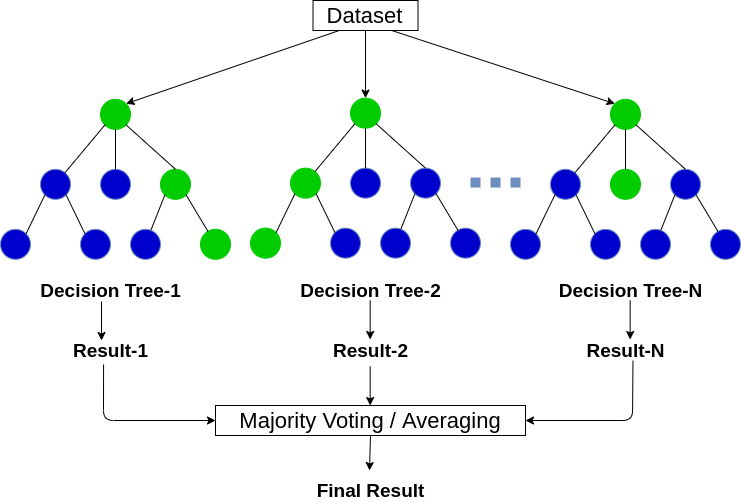

In [31]:
Image("./10.png")

Bagging Ensemble의 대표적인 기법인 Random forest입니다.

앞선 배깅 구조의 의사결정 트리에 랜덤하게 나온 것을 투표하여 결정합니다.

과반수 투표와 만장일치 투표등이 있으며 최종 결과를 도출합니다.

RF의 장점은 다양한 갯수의 의사결정트리 덕에 과적합이 방지되며, 결측치에 강합니다.

다만 데이터의 수가 많은 경우에는 Dicision Tree에 비해 속도가 크게 떨어진다는 단점이 있습니다.

In [37]:
# evaluate a decision tree on the classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=5)
# define the random subspace ensemble model
model = RandomForestClassifier(n_estimators=100,verbose=1)
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.964


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### RandomForestClassifier parameter
n_estimators : 모델에서 사용할 트리 갯수(학습시 생성할 트리 갯수)

max_depth : 트리의 최대 깊이

min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)

max_features : 각 노드에서 분할에 사용할 특징의 최대 수

bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부

oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부

n_jobs :적합성과 예측성을 위해 병렬로 실행할 작업 수

random_state : 난수 seed 설정

verbose : 실행 과정 출력 여부

# chapter 18. Extra Trees Ensemble

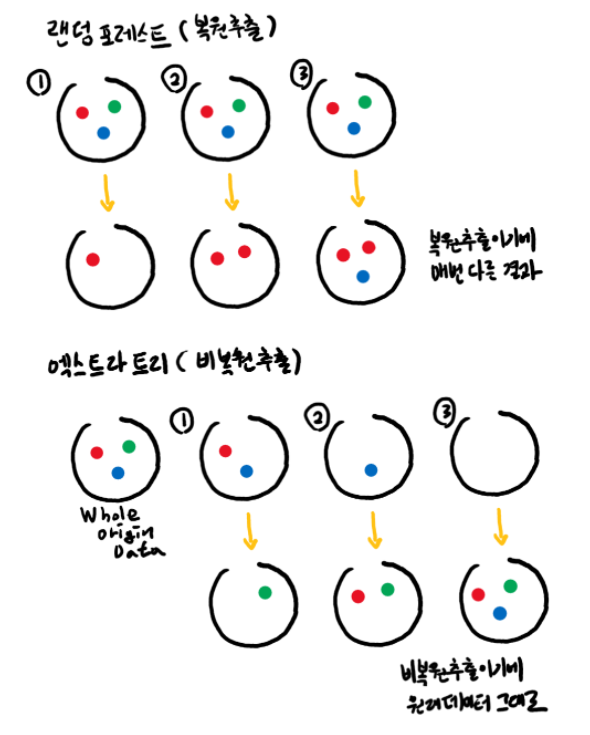

In [38]:
Image("./11.png")

extra tree와 RF의 비교입니다.

RF는 bootstrap을 기반으로 하기때문에 모든 tree가 aggregating 되었을 때 ensemble효과가 나는 것이고,

ET는 bootstrap을 하지 않고,전체 데이터를 그대로 가져다 쓰는 특징이 있습니다.(bagging이라 하기엔 애매함)

그뒤의 학습은 모두 같습니다.

In [41]:
# evaluate a decision tree on the classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=5)
# define the random subspace ensemble model
model = ExtraTreesClassifier()
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.976


현재까지 나온 Bagging모델 중 가장 최신모델이며, 정확도가 가장 높은 것을 보입니다.

다만 최신에 나온 모델이라서 꼭 정확도가 높다는 법은 없으며 데이터 특징에 따라 

분류기를 정해야 한다는 특징이 있습니다.

# chapter 19. Data Transform Bagging Ensemble

In [42]:
# evaluate a decision tree on the classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=5)
# define the random subspace ensemble model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.882


데이터 전처리를 거친 후 같은 bagging 기법인 DecisionTree분류기로 비교하기 위해 baseline model을 불러왔습니다.

In [45]:
# evaluate data transform bagging ensemble on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeClassifier())])
	models.append(('norm', norm))
	# standardization
	st = Pipeline([('s', StandardScaler()), ('m', DecisionTreeClassifier())])
	models.append(('std', st))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeClassifier())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeClassifier())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeClassifier())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeClassifier())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# get the ensemble model
ensemble = get_ensemble()
# fit the model
ensemble.fit(X_train, y_train)
# make predictions on the test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.891


baseline model에 비해 데이터 전처리한 이후에 약간의 정확도 향상을 보인다.

### sklearn.preprocessing 종류 및 소개

MinMaxScaler-정규화(0~1 스케일링)

StandardScaler-표준화(변수의 스케일값 조절)(단위차이등)

RobustScaler-표준 정규화(평균값대신 중앙값사용)

PowerTransformer-정규 분포변환(분포도를 그린후 치우쳐 있으면 정규 분포로 변환)

QuantileTransformer-균등 분포변환(robust와 유사)

KBinsDiscretizer-구간화(연속적인 변수를 그룹화)

데이터 전처리 관련 라이브러리는 scikit-learn홈페이지에 자세히 제공되어 있습니다.

# 감사합니다. 